In [12]:
import numpy as np
import sklearn as sk

# read .mat files
import scipy.io as sio
train = sio.loadmat('../data/train_32x32.mat')
test = sio.loadmat('../data/test_32x32.mat')

# extract data and labels
train_data: np.ndarray = train['X']
train_labels: np.ndarray = train['y']
test_data: np.ndarray = test['X']
test_labels: np.ndarray = test['y']


array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ...,

        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

In [45]:
# sklearn PCA
tr_pca_1 = None
te_pca_1 = None
k = False
from sklearn.decomposition import PCA
with open('pca.csv', 'w') as f:
    print('v', file=f)
    for i in range(1, 33):
        pca, tr, te = train_pca(i)
        u = sum(pca.explained_variance_ratio_)
        if u >= 0.9 and not k:
            tr_pca_1 = tr
            te_pca_1 = te
            k = True
        print(u)
        print(u, file=f)

0.5791350775427454
0.6362434099336036
0.6890545127776965
0.7295694415561789
0.7512304567885234
0.7691417091755571
0.7845816463911373
0.7994565924885126
0.8119170434956614
0.8233009710929706
0.8324723543199146
0.84093798547777
0.8481770469316566
0.8536853592392029
0.8589923462593054
0.8641444712736107
0.8689994502391999
0.8732225212061329
0.8773210950782059
0.8810683967902169
0.8846840524657454
0.888117066617758
0.8913903180667777
0.8945251397357562
0.8975782430305598
0.9005742128326107
0.9033619459323704
0.906100991945207
0.9086948924570166
0.9111896819938842
0.9136751486288229
0.9160045188201953


PoV = 0.901 > 0.9 achieved at 26 dimensions


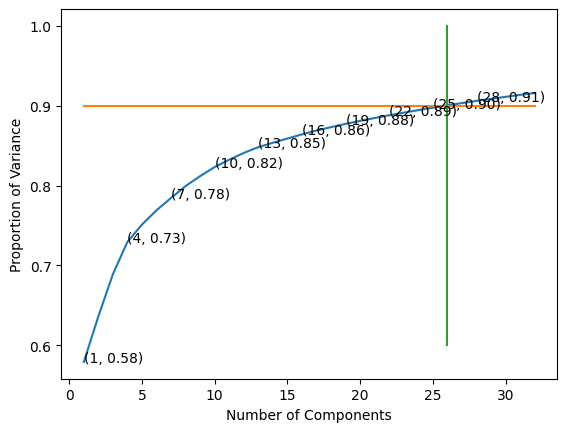

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('pca.csv')

plt.plot(range(1, 33), df['v'])
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance') #for each component
v = 0
for i in range(1, 33, 3):
    plt.annotate(f'({i}, {df["v"][i-1]:.2f})', (i, df['v'][i-1]))
    if df['v'][i-1] >= 0.9:
        v = i
        break   

plt.plot(np.linspace(1, 32, 320), [0.9] * 320)
plt.plot([v - 2] * 320, np.linspace(0.6, 1.0, 320))
print(f'PoV = {df["v"][25]:.3f} > 0.9 achieved at 26 dimensions')
plt.show()

In [25]:
def train_pca(i) -> (PCA, np.ndarray, np.ndarray):
    pca = PCA(n_components=i)
    pca.fit(train_data.reshape(train_data.shape[0], -1))
    train_data_pca = pca.transform(train_data.reshape(train_data.shape[0], -1))
    test_data_pca = pca.transform(test_data.reshape(test_data.shape[0], -1))
    return pca, train_data_pca, test_data_pca


In [50]:
pca, tr_pca_2, te_pca_2 = train_pca(10)




[[ 0.0175361   0.01820365  0.01876029 ...  0.01695385  0.01756518
   0.01805227]
 [ 0.01909275  0.02145568  0.02094557 ... -0.01947351 -0.02131272
  -0.02016714]
 [-0.01831693 -0.01426355 -0.00251158 ... -0.01803384 -0.01372899
  -0.00148765]
 ...
 [-0.02583135 -0.02121578 -0.01669463 ...  0.00746618  0.01371316
   0.01832134]
 [ 0.00784862  0.00933181  0.00781459 ...  0.02507099  0.02734569
   0.02488773]
 [ 0.00365691  0.00447148  0.00506534 ... -0.01612105 -0.01682271
  -0.01692168]]
[4564213.3655362   450075.68025025  416208.84452809  319301.63895299
  170712.32442912  141160.12103772  121683.47318154  117230.72970629
   98201.88594926   89717.71288833]


TypeError: 'zip' object is not subscriptable

In [65]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.0175361   0.01820365  0.01876029 ...  0.01695385  0.01756518
   0.01805227]
 [ 0.01909275  0.02145568  0.02094557 ... -0.01947351 -0.02131272
  -0.02016714]
 [-0.01831693 -0.01426355 -0.00251158 ... -0.01803384 -0.01372899
  -0.00148765]
 ...
 [-0.02583135 -0.02121578 -0.01669463 ...  0.00746618  0.01371316
   0.01832134]
 [ 0.00784862  0.00933181  0.00781459 ...  0.02507099  0.02734569
   0.02488773]
 [ 0.00365691  0.00447148  0.00506534 ... -0.01612105 -0.01682271
  -0.01692168]]
[4564213.3655362   450075.68025025  416208.84452809  319301.63895299
  170712.32442912  141160.12103772  121683.47318154  117230.72970629
   98201.88594926   89717.71288833]


In [63]:
# find the position of the first occurence of every label in tr_pca_2
zipped = list(zip(tr_pca_2, train_labels))
srt = sorted(zipped, key=lambda x: x[1])
# print(srt[0])
x = -1
for i in srt:
    if i[1] != x:
        print(list(i[0]))
        x = i[1]

[-2851.8587608865455, -304.0618724734884, -340.7486167772137, 668.0064617679565, 178.63597388193068, -41.798406145901794, -346.5563651383406, 260.7572522958166, 343.4461003471446, 112.35546584921136]
[3857.528874610815, -443.666524923529, 2121.7112646237993, 832.0778585885367, -780.6836401550343, 442.2700941339966, -399.97780531440515, 514.1463889905223, -318.8308728849787, -317.00221651858647]
[4029.9868051950702, 219.811067250671, 2093.29238256439, 1086.8746684293383, -941.3900700423462, -605.2020219254831, 631.6660557421462, 787.9847961996089, 195.64605968085814, -254.09133778674976]
[2908.551523411724, 252.57967213983085, -166.95711972682966, 364.94737434535944, -196.29418229454194, -285.70355851164254, -49.954788225502206, -26.86006781056821, 77.10038843533749, -540.2142704255513]
[700.5033864157293, 236.54488719802083, -111.94405859349817, 234.40251352397365, -396.2576044632042, 116.21349833331966, 170.6759309536693, 152.83848684155095, 202.94182274768372, -69.61096860695791]
[-1

In [69]:
# run k-NN on data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def knn(k) -> (float, float, float):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data.reshape(train_data.shape[0], -1), train_labels)
    x = accuracy_score(test_labels, knn.predict(test_data.reshape(test_data.shape[0], -1)))
    knn.fit(tr_pca_1, train_labels)
    y = accuracy_score(test_labels, knn.predict(te_pca_1))
    knn.fit(tr_pca_1, train_labels)
    z = accuracy_score(test_labels, knn.predict(te_pca_1))
    return (x, y, z)

(knn(5), knn(7))

/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KeyboardInterrupt: 

In [68]:
test_labels.shape

(26032, 1)